In [11]:
%matplotlib inline

import geopandas as gpd

import sys
sys.path.insert(0, "../")
from weavingspace import TileUnit
from weavingspace import Tiling

In [12]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

# Cairo tiles [3<sup>2</sup>.4.3.4]
The one true tiling. Provides 4 directionally distinguishable elements... and also can be read two different ways (intersecting hexagons runninng in two orthogonal directions).

A fine choice!


<Axes: >

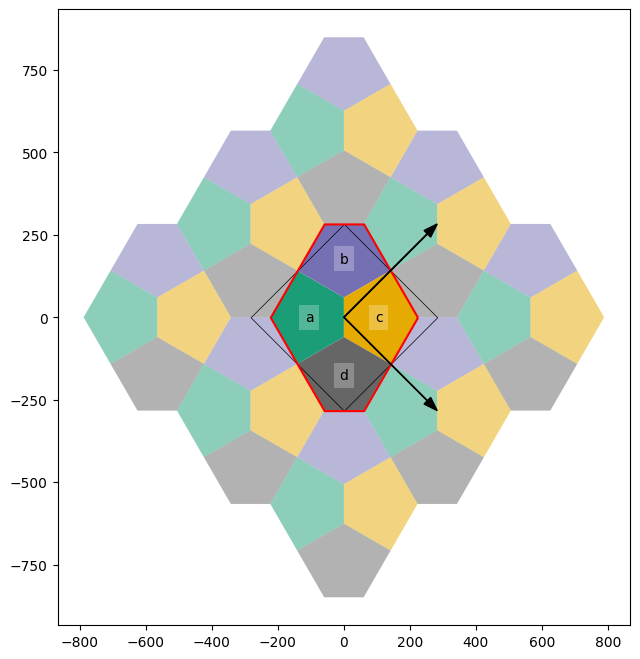

In [13]:
tile_unit = TileUnit(tiling_type = "laves", code = "3.3.4.3.4",
                     spacing = 400, crs = ak.crs)
tile_unit.plot(r = 1, show_vectors = True)

In [14]:
tiling = Tiling(tile_unit.inset_prototile(12.5), ak)

In [15]:
t = tiling.get_tiled_map(join_on_prototiles = False)

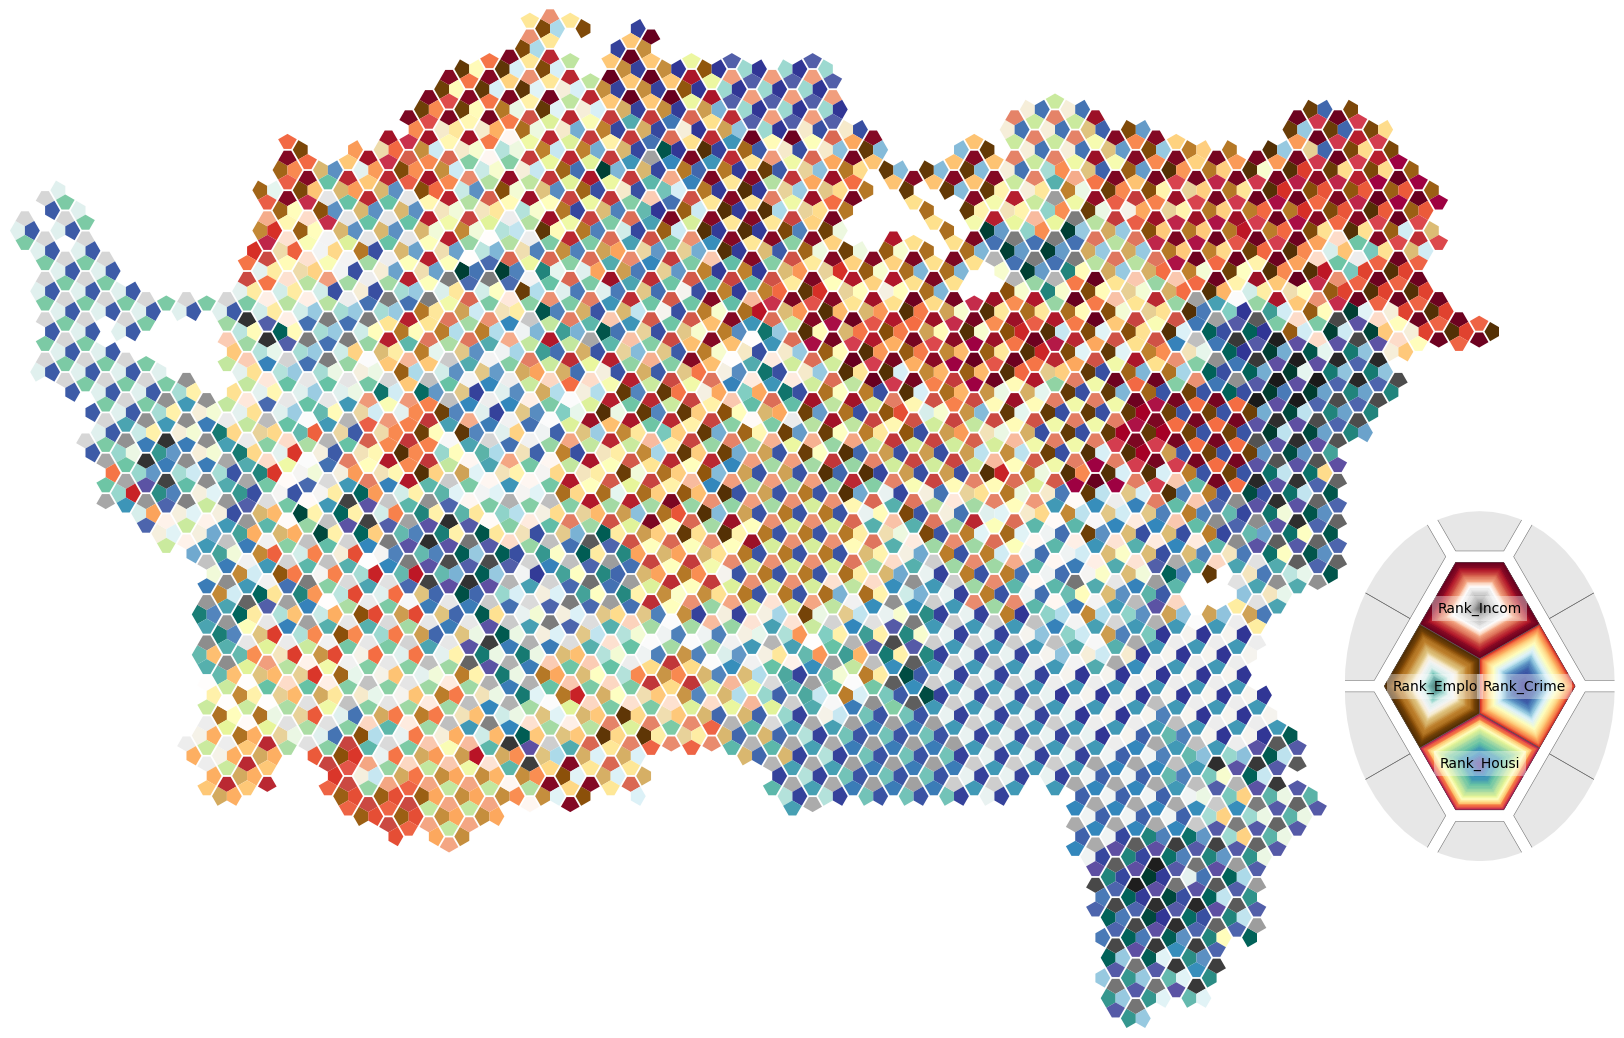

In [16]:
t.ids_to_map = list("abcd")
t.vars_to_map = [x for x in ak if "Rank" in x and not "IMD" in x]
t.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral",
                   "PiYG", "PRGn", "PuOr", "viridis")

fig = t.render(use_ellipse = True, legend_dx = -0.075, legend_dy = -0.375)

## An alternative perspective
The elements of any given tiling can be rearranged with respect to the base tile, and if the `regularised_tile` is then remade from the repositioned elements, different effects can be achieved by insetting to emphasize different repeating units in the pattern.

In this case, we move the lower two elements _a_ and _d_ up and to the right, and the _b_ and _c_ down and to the left, andform a cross-like grouping of the tiles instead of the hexagonal arrangement. The retiled map is quite different in appearance, although it contains the same data.

<Axes: >

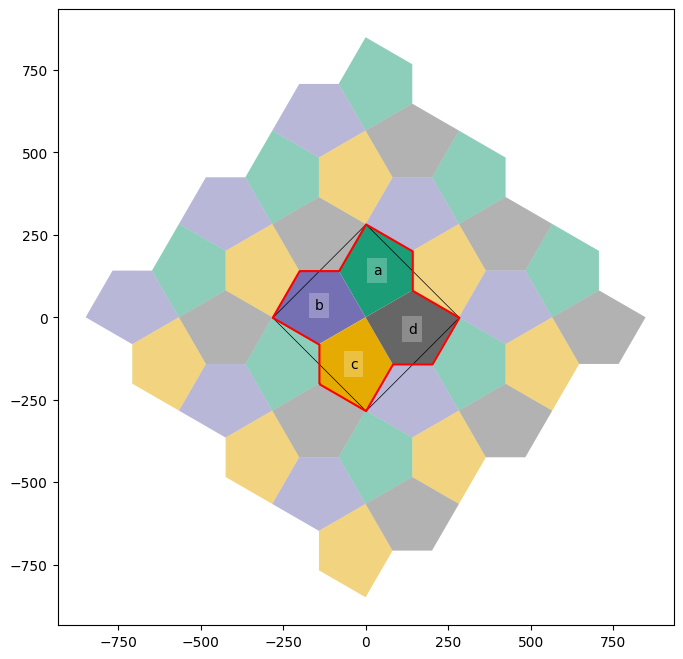

In [17]:
from shapely.affinity import translate

v = tile_unit.get_vectors()
v = [v[0], v[2], v[2], v[0]]
tile_unit.tiles.geometry = gpd.GeoSeries(
    [translate(g, xy[0] / 2, xy[1] / 2) 
     for g, xy in zip(tile_unit.tiles.geometry, v)])
tile_unit._setup_regularised_prototile()
tile_unit.plot(r = 1)

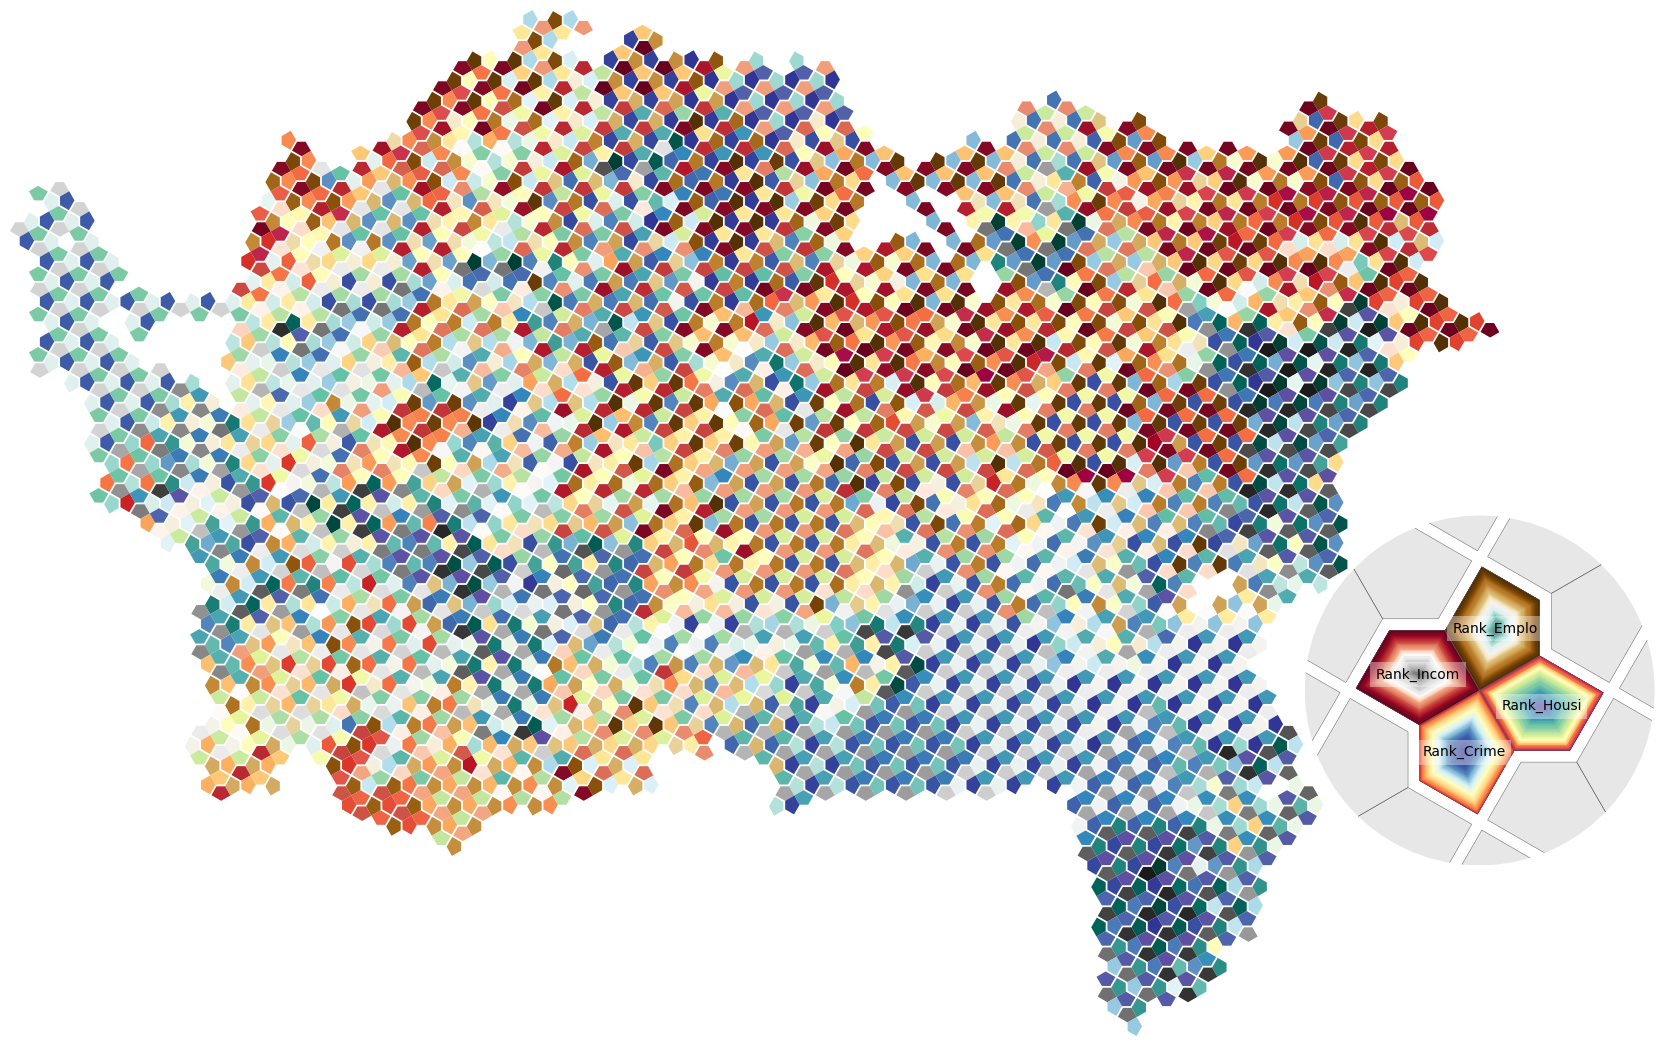

In [18]:
tiling = Tiling(tile_unit.inset_prototile(12.5), ak)
t = tiling.get_tiled_map(join_on_prototiles = True)

t.ids_to_map = list("abcd")
t.vars_to_map = [x for x in ak if "Rank" in x and not "IMD" in x]
t.colors_to_use = ("BrBG", "RdGy", "RdYlBu", "Spectral",
                   "PiYG", "PRGn", "PuOr", "viridis")

fig = t.render(use_ellipse = True, legend_dx = -0.075, legend_dy = -0.375)